In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# Q1
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no Null Values

<AxesSubplot:>

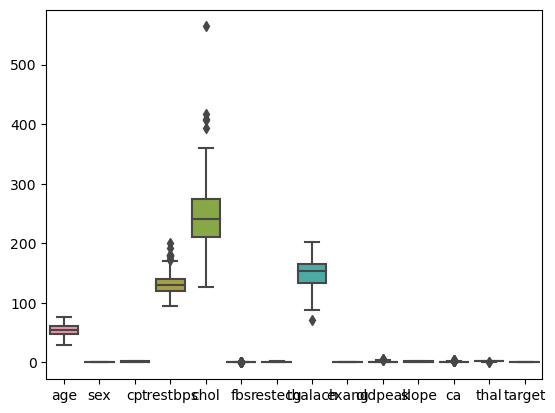

In [7]:
sns.boxplot(data = df)

In [20]:
# dividing data intp independent and dependent Variable
X = df.drop('target',axis = 1)
y = df['target']
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-1.67339636, -1.39443338,  0.95280942, ...,  0.955317  ,
        -0.67629057, -0.54888242],
       [-2.76362385,  0.71713717, -0.01367669, ...,  0.955317  ,
        -0.67629057, -0.54888242],
       [-0.47414611, -1.39443338,  0.95280942, ..., -0.67796691,
        -0.67629057, -0.54888242],
       ...,
       [ 1.59728613,  0.71713717,  1.91929553, ..., -0.67796691,
         0.37792709, -0.54888242],
       [-0.91023711,  0.71713717, -0.9801628 , ...,  0.955317  ,
        -0.67629057,  1.13753893],
       [ 0.94314964, -1.39443338, -0.01367669, ...,  0.955317  ,
         1.43214475, -0.54888242]])

In [34]:
#q2

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 41)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [35]:
# Q3

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=10)

In [36]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [37]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [38]:
# Q4

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[39  8]
 [ 4 40]]
0.8681318681318682
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        47
           1       0.83      0.91      0.87        44

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [39]:
# Q5
model.feature_importances_

array([0.10549587, 0.03704739, 0.15842018, 0.06981493, 0.07675052,
       0.01114471, 0.02303959, 0.10535037, 0.03941028, 0.10564399,
       0.03979751, 0.1306512 , 0.09743345])

In [43]:
# Q6
param = {
    'n_estimators' : [50,70,100,130],
    'criterion' : ['gini','entropy','log_loss'],
    'max_depth' : [5,10,15],
    'min_samples_split' :[2,3,4],
    'min_samples_leaf' :[1,2]
} 

In [44]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(RandomForestClassifier(),cv = 5,verbose = 10,param_grid = param)

In [45]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5; 1/216] START criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/5; 1/216] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.1s
[CV 2/5; 1/216] START criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/5; 1/216] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.744 total time=   0.0s
[CV 3/5; 1/216] START criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 1/216] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.857 total time=   0.0s
[CV 4/5; 1/216] START criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 4/5; 1/216] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=

[CV 5/5; 7/216] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.738 total time=   0.1s
[CV 1/5; 8/216] START criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=130
[CV 1/5; 8/216] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=130;, score=0.837 total time=   0.2s
[CV 2/5; 8/216] START criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=130
[CV 2/5; 8/216] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=130;, score=0.767 total time=   0.1s
[CV 3/5; 8/216] START criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=130
[CV 3/5; 8/216] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=130;, score=0.810 total time=   0.1s
[CV 4/5; 8/216] START criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=130
[CV 

[CV 4/5; 14/216] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.762 total time=   0.1s
[CV 5/5; 14/216] START criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 5/5; 14/216] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.786 total time=   0.0s
[CV 1/5; 15/216] START criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 1/5; 15/216] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.1s
[CV 2/5; 15/216] START criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 2/5; 15/216] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.791 total time=   0.1s
[CV 3/5; 15/216] START criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100

[CV 2/5; 21/216] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.767 total time=   0.0s
[CV 3/5; 21/216] START criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50
[CV 3/5; 21/216] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.833 total time=   0.0s
[CV 4/5; 21/216] START criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50
[CV 4/5; 21/216] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.810 total time=   0.0s
[CV 5/5; 21/216] START criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50
[CV 5/5; 21/216] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.786 total time=   0.0s
[CV 1/5; 22/216] START criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=70
[CV 

[CV 1/5; 28/216] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=130;, score=0.814 total time=   0.3s
[CV 2/5; 28/216] START criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=130
[CV 2/5; 28/216] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=130;, score=0.744 total time=   0.3s
[CV 3/5; 28/216] START criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=130
[CV 3/5; 28/216] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=130;, score=0.833 total time=   0.3s
[CV 4/5; 28/216] START criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=130
[CV 4/5; 28/216] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=130;, score=0.833 total time=   0.2s
[CV 5/5; 28/216] START criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_est

[CV 4/5; 34/216] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=70;, score=0.786 total time=   0.1s
[CV 5/5; 34/216] START criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=70
[CV 5/5; 34/216] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=70;, score=0.786 total time=   0.1s
[CV 1/5; 35/216] START criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 1/5; 35/216] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.860 total time=   0.1s
[CV 2/5; 35/216] START criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 2/5; 35/216] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.791 total time=   0.1s
[CV 3/5; 35/216] START criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estima

[CV 2/5; 41/216] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.767 total time=   0.0s
[CV 3/5; 41/216] START criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 3/5; 41/216] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.786 total time=   0.0s
[CV 4/5; 41/216] START criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 4/5; 41/216] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.833 total time=   0.0s
[CV 5/5; 41/216] START criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 5/5; 41/216] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.786 total time=   0.0s
[CV 1/5; 42/216] START criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators

[CV 1/5; 48/216] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=0.814 total time=   0.1s
[CV 2/5; 48/216] START criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=130
[CV 2/5; 48/216] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=0.767 total time=   0.2s
[CV 3/5; 48/216] START criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=130
[CV 3/5; 48/216] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=0.786 total time=   0.3s
[CV 4/5; 48/216] START criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=130
[CV 4/5; 48/216] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=0.810 total time=   0.2s
[CV 5/5; 48/216] START criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_est

[CV 4/5; 54/216] END criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=70;, score=0.833 total time=   0.0s
[CV 5/5; 54/216] START criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=70
[CV 5/5; 54/216] END criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=70;, score=0.762 total time=   0.0s
[CV 1/5; 55/216] START criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=100
[CV 1/5; 55/216] END criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.814 total time=   0.1s
[CV 2/5; 55/216] START criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=100
[CV 2/5; 55/216] END criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.767 total time=   0.1s
[CV 3/5; 55/216] START criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estima

[CV 2/5; 61/216] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.767 total time=   0.0s
[CV 3/5; 61/216] START criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 61/216] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.833 total time=   0.0s
[CV 4/5; 61/216] START criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 61/216] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.762 total time=   0.0s
[CV 5/5; 61/216] START criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 61/216] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.786 total time=   0.0s
[CV 1/5; 62/216] START criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators

[CV 1/5; 68/216] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=130;, score=0.837 total time=   0.3s
[CV 2/5; 68/216] START criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=130
[CV 2/5; 68/216] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=130;, score=0.767 total time=   0.2s
[CV 3/5; 68/216] START criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=130
[CV 3/5; 68/216] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=130;, score=0.857 total time=   0.1s
[CV 4/5; 68/216] START criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=130
[CV 4/5; 68/216] END criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=130;, score=0.833 total time=   0.2s
[CV 5/5; 68/216] START criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=3, n_est

[CV 5/5; 74/216] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.786 total time=   0.0s
[CV 1/5; 75/216] START criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 75/216] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.814 total time=   0.1s
[CV 2/5; 75/216] START criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 75/216] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.744 total time=   0.1s
[CV 3/5; 75/216] START criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 75/216] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.786 total time=   0.1s
[CV 4/5; 75/216] START criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples

[CV 2/5; 81/216] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=0.791 total time=   0.0s
[CV 3/5; 81/216] START criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50
[CV 3/5; 81/216] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=0.833 total time=   0.0s
[CV 4/5; 81/216] START criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50
[CV 4/5; 81/216] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=0.786 total time=   0.0s
[CV 5/5; 81/216] START criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50
[CV 5/5; 81/216] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=0.762 total time=   0.0s
[CV 1/5; 82/216] START criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split

[CV 5/5; 87/216] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.786 total time=   0.2s
[CV 1/5; 88/216] START criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=130
[CV 1/5; 88/216] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=0.837 total time=   0.1s
[CV 2/5; 88/216] START criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=130
[CV 2/5; 88/216] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=0.767 total time=   0.1s
[CV 3/5; 88/216] START criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=130
[CV 3/5; 88/216] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=0.833 total time=   0.1s
[CV 4/5; 88/216] START criterion=entropy, max_depth=5, min_samples_leaf=2, min_sample

[CV 4/5; 94/216] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=70;, score=0.810 total time=   0.1s
[CV 5/5; 94/216] START criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=70
[CV 5/5; 94/216] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=70;, score=0.762 total time=   0.0s
[CV 1/5; 95/216] START criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100
[CV 1/5; 95/216] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.860 total time=   0.1s
[CV 2/5; 95/216] START criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100
[CV 2/5; 95/216] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.791 total time=   0.1s
[CV 3/5; 95/216] START criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_s

[CV 3/5; 101/216] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.786 total time=   0.0s
[CV 4/5; 101/216] START criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 4/5; 101/216] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.810 total time=   0.0s
[CV 5/5; 101/216] START criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 5/5; 101/216] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.762 total time=   0.0s
[CV 1/5; 102/216] START criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=70
[CV 1/5; 102/216] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=70;, score=0.791 total time=   0.0s
[CV 2/5; 102/216] START criterion=entropy, max_depth=10, min_samples_leaf=1, m

[CV 1/5; 108/216] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=130;, score=0.837 total time=   0.2s
[CV 2/5; 108/216] START criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=130
[CV 2/5; 108/216] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=130;, score=0.791 total time=   0.1s
[CV 3/5; 108/216] START criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=130
[CV 3/5; 108/216] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=130;, score=0.810 total time=   0.1s
[CV 4/5; 108/216] START criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=130
[CV 4/5; 108/216] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=130;, score=0.833 total time=   0.1s
[CV 5/5; 108/216] START criterion=entropy, max_depth=10, min_samples_le

[CV 3/5; 114/216] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=70;, score=0.810 total time=   0.1s
[CV 4/5; 114/216] START criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=70
[CV 4/5; 114/216] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=70;, score=0.833 total time=   0.0s
[CV 5/5; 114/216] START criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=70
[CV 5/5; 114/216] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=70;, score=0.786 total time=   0.0s
[CV 1/5; 115/216] START criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=100
[CV 1/5; 115/216] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.837 total time=   0.1s
[CV 2/5; 115/216] START criterion=entropy, max_depth=10, min_samples_leaf=2,

[CV 5/5; 120/216] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=130;, score=0.738 total time=   0.1s
[CV 1/5; 121/216] START criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/5; 121/216] END criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.791 total time=   0.0s
[CV 2/5; 121/216] START criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/5; 121/216] END criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.744 total time=   0.0s
[CV 3/5; 121/216] START criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 121/216] END criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.833 total time=   0.0s
[CV 4/5; 121/216] START criterion=entropy, max_depth=15, min_samples_leaf=1, 

[CV 2/5; 127/216] END criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.814 total time=   0.2s
[CV 3/5; 127/216] START criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=100
[CV 3/5; 127/216] END criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.786 total time=   0.1s
[CV 4/5; 127/216] START criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=100
[CV 4/5; 127/216] END criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.786 total time=   0.1s
[CV 5/5; 127/216] START criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=100
[CV 5/5; 127/216] END criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.762 total time=   0.1s
[CV 1/5; 128/216] START criterion=entropy, max_depth=15, min_samples_le

[CV 5/5; 133/216] END criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.738 total time=   0.0s
[CV 1/5; 134/216] START criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 1/5; 134/216] END criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.814 total time=   0.1s
[CV 2/5; 134/216] START criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 2/5; 134/216] END criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.744 total time=   0.0s
[CV 3/5; 134/216] START criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 3/5; 134/216] END criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.833 total time=   0.1s
[CV 4/5; 134/216] START criterion=entropy, max_depth=15, min_samples_leaf=2, m

[CV 3/5; 140/216] END criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=130;, score=0.786 total time=   0.1s
[CV 4/5; 140/216] START criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=130
[CV 4/5; 140/216] END criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=130;, score=0.833 total time=   0.1s
[CV 5/5; 140/216] START criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=130
[CV 5/5; 140/216] END criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=130;, score=0.786 total time=   0.1s
[CV 1/5; 141/216] START criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=50
[CV 1/5; 141/216] END criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.860 total time=   0.0s
[CV 2/5; 141/216] START criterion=entropy, max_depth=15, min_samples_leaf

[CV 1/5; 147/216] END criterion=log_loss, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 147/216] START criterion=log_loss, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 147/216] END criterion=log_loss, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5; 147/216] START criterion=log_loss, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 147/216] END criterion=log_loss, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5; 147/216] START criterion=log_loss, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 147/216] END criterion=log_loss, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5; 147/216] START criterion=log_loss, max_depth=5, min_samples_leaf=1, mi

[CV 5/5; 153/216] END criterion=log_loss, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5; 154/216] START criterion=log_loss, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=70
[CV 1/5; 154/216] END criterion=log_loss, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=70;, score=nan total time=   0.0s
[CV 2/5; 154/216] START criterion=log_loss, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=70
[CV 2/5; 154/216] END criterion=log_loss, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=70;, score=nan total time=   0.0s
[CV 3/5; 154/216] START criterion=log_loss, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=70
[CV 3/5; 154/216] END criterion=log_loss, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=70;, score=nan total time=   0.0s
[CV 4/5; 154/216] START criterion=log_loss, max_depth=5, min_samples_leaf=1, min_sampl

[CV 2/5; 160/216] END criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=nan total time=   0.0s
[CV 3/5; 160/216] START criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=130
[CV 3/5; 160/216] END criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=nan total time=   0.0s
[CV 4/5; 160/216] START criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=130
[CV 4/5; 160/216] END criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=nan total time=   0.0s
[CV 5/5; 160/216] START criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=130
[CV 5/5; 160/216] END criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=nan total time=   0.0s
[CV 1/5; 161/216] START criterion=log_loss, max_depth=5, min_samples_leaf=2, mi

[CV 5/5; 166/216] END criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=70;, score=nan total time=   0.0s
[CV 1/5; 167/216] START criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100
[CV 1/5; 167/216] END criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 167/216] START criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100
[CV 2/5; 167/216] END criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5; 167/216] START criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100
[CV 3/5; 167/216] END criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5; 167/216] START criterion=log_loss, max_depth=5, min_samples_leaf=2, min

[CV 4/5; 173/216] END criterion=log_loss, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5; 173/216] START criterion=log_loss, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 5/5; 173/216] END criterion=log_loss, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5; 174/216] START criterion=log_loss, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=70
[CV 1/5; 174/216] END criterion=log_loss, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=70;, score=nan total time=   0.0s
[CV 2/5; 174/216] START criterion=log_loss, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=70
[CV 2/5; 174/216] END criterion=log_loss, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=70;, score=nan total time=   0.0s
[CV 3/5; 174/216] START criterion=log_loss, max_depth=10, min_samples_leaf=1, m

[CV 3/5; 180/216] END criterion=log_loss, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=130;, score=nan total time=   0.0s
[CV 4/5; 180/216] START criterion=log_loss, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=130
[CV 4/5; 180/216] END criterion=log_loss, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=130;, score=nan total time=   0.0s
[CV 5/5; 180/216] START criterion=log_loss, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=130
[CV 5/5; 180/216] END criterion=log_loss, max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=130;, score=nan total time=   0.0s
[CV 1/5; 181/216] START criterion=log_loss, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 181/216] END criterion=log_loss, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5; 181/216] START criterion=log_loss, max_depth=10, min_samples_leaf

[CV 4/5; 187/216] END criterion=log_loss, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5; 187/216] START criterion=log_loss, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=100
[CV 5/5; 187/216] END criterion=log_loss, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5; 188/216] START criterion=log_loss, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=130
[CV 1/5; 188/216] END criterion=log_loss, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=130;, score=nan total time=   0.0s
[CV 2/5; 188/216] START criterion=log_loss, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=130
[CV 2/5; 188/216] END criterion=log_loss, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=130;, score=nan total time=   0.0s
[CV 3/5; 188/216] START criterion=log_loss, max_depth=10, min_samples_le

[CV 3/5; 194/216] END criterion=log_loss, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=nan total time=   0.0s
[CV 4/5; 194/216] START criterion=log_loss, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 4/5; 194/216] END criterion=log_loss, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=nan total time=   0.0s
[CV 5/5; 194/216] START criterion=log_loss, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 5/5; 194/216] END criterion=log_loss, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=nan total time=   0.0s
[CV 1/5; 195/216] START criterion=log_loss, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 195/216] END criterion=log_loss, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 195/216] START criterion=log_loss, max_depth=15, min_samples_leaf=1,

[CV 1/5; 201/216] END criterion=log_loss, max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5; 201/216] START criterion=log_loss, max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=50
[CV 2/5; 201/216] END criterion=log_loss, max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5; 201/216] START criterion=log_loss, max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=50
[CV 3/5; 201/216] END criterion=log_loss, max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5; 201/216] START criterion=log_loss, max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=50
[CV 4/5; 201/216] END criterion=log_loss, max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5; 201/216] START criterion=log_loss, max_depth=15, min_samples_leaf=1, m

[CV 5/5; 207/216] END criterion=log_loss, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5; 208/216] START criterion=log_loss, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=130
[CV 1/5; 208/216] END criterion=log_loss, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=nan total time=   0.0s
[CV 2/5; 208/216] START criterion=log_loss, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=130
[CV 2/5; 208/216] END criterion=log_loss, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=nan total time=   0.0s
[CV 3/5; 208/216] START criterion=log_loss, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=130
[CV 3/5; 208/216] END criterion=log_loss, max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=nan total time=   0.0s
[CV 4/5; 208/216] START criterion=log_loss, max_depth=15, min_samples_le

[CV 3/5; 214/216] END criterion=log_loss, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=70;, score=nan total time=   0.0s
[CV 4/5; 214/216] START criterion=log_loss, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=70
[CV 4/5; 214/216] END criterion=log_loss, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=70;, score=nan total time=   0.0s
[CV 5/5; 214/216] START criterion=log_loss, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=70
[CV 5/5; 214/216] END criterion=log_loss, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=70;, score=nan total time=   0.0s
[CV 1/5; 215/216] START criterion=log_loss, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=100
[CV 1/5; 215/216] END criterion=log_loss, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 215/216] START criterion=log_loss, max_depth=15, min_samples_leaf=2,

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Lenovo\anaconda3\lib\site-pa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 70, 100, 130]},
             verbose=10)

In [54]:
# Q7
model.best_params_
classifier = RandomForestClassifier(criterion = 'entropy',max_depth = 5,min_samples_leaf = 1,min_samples_split = 2,n_estimators = 50)

In [55]:
classifier.fit(X_train,y_train)
y_hyper_pred = classifier.predict(X_test)
y_hyper_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [56]:
#Q8

print(f'Defualt Model Accuracy : {accuracy_score(y_test,y_pred)}')
print(f'HyperTuned Model Accuracy : {accuracy_score(y_test,y_hyper_pred)}')

Defualt Model Accuracy : 0.8681318681318682
HyperTuned Model Accuracy : 0.8241758241758241


In [59]:
importance = classifier.feature_importances_

<AxesSubplot:>

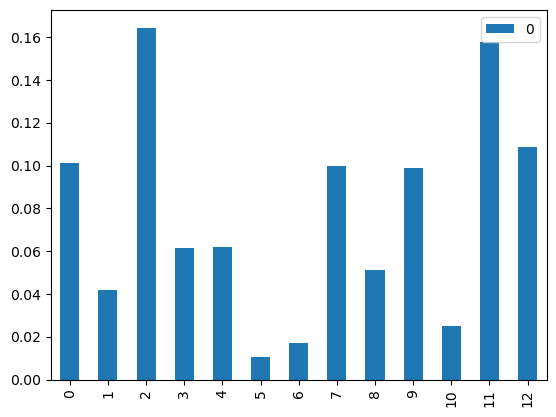

In [64]:
importance_df = pd.DataFrame(importance)
importance_df.plot.bar()

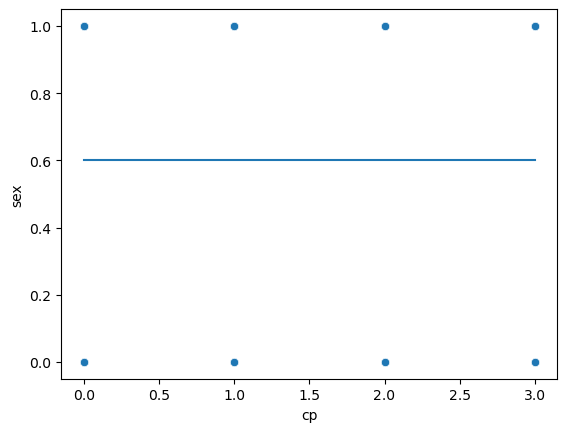

In [81]:
# Q8
sns.scatterplot(data = df,x = df.iloc[:,2],y = df.iloc[:,1])
plt.plot([0.0,3.0],[0.6,0.6])
plt.show()